-1. Cài đặt kaggle

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

2. Import data "Face Mask Detection" từ kaggle

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 161M/163M [00:08<00:00, 24.2MB/s]
100% 163M/163M [00:08<00:00, 20.6MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1451.jpg', 'with_mask_3051.jpg', 'with_mask_1526.jpg', 'with_mask_3093.jpg', 'with_mask_2833.jpg']
['with_mask_2820.jpg', 'with_mask_529.jpg', 'with_mask_2566.jpg', 'with_mask_17.jpg', 'with_mask_2857.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3402.jpg', 'without_mask_1742.jpg', 'without_mask_1197.jpg', 'without_mask_3131.jpg', 'without_mask_2825.jpg']
['without_mask_712.jpg', 'without_mask_2898.jpg', 'without_mask_3571.jpg', 'without_mask_506.jpg', 'without_mask_603.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


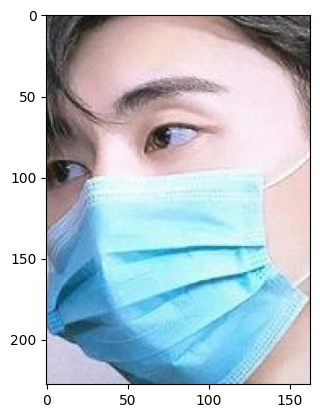

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

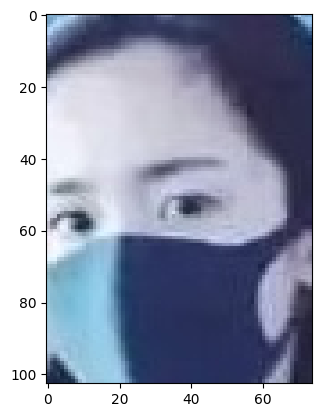

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1111.jpg')
imgplot = plt.imshow(img)
plt.show()

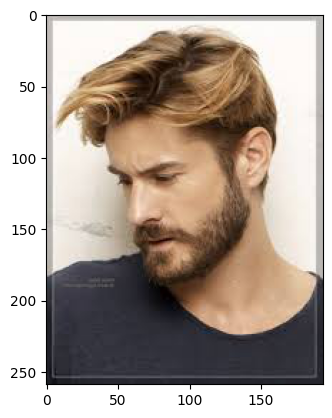

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2510.jpg')
imgplot = plt.imshow(img)
plt.show()

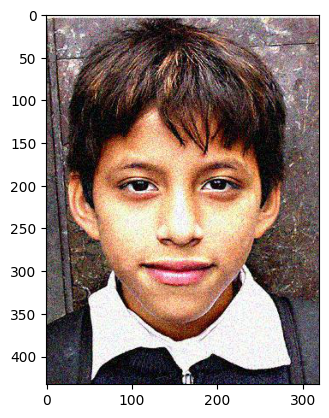

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1203.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

Image Processing

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
print(type(data))
print(len(data))
print(data[0])
print(type(data[0]))
print(data[0].shape)

<class 'list'>
7553
[[[ 98  91  83]
  [ 61  52  45]
  [ 58  45  39]
  ...
  [ 73  58  53]
  [ 78  64  58]
  [ 92  79  72]]

 [[133 125 118]
  [ 90  81  74]
  [ 69  57  50]
  ...
  [ 67  52  49]
  [ 70  56  53]
  [ 81  67  63]]

 [[150 144 136]
  [109 101  93]
  [ 70  58  52]
  ...
  [ 52  38  38]
  [ 54  40  39]
  [ 62  47  47]]

 ...

 [[172 127 103]
  [187 131 116]
  [220 149 139]
  ...
  [221  57  51]
  [215  51  47]
  [212  47  45]]

 [[231 150 142]
  [223 129 129]
  [250 142 144]
  ...
  [203  38  30]
  [204  41  34]
  [212  49  46]]

 [[247 130 136]
  [231 104 115]
  [215  78  89]
  ...
  [215  44  37]
  [211  43  38]
  [211  43  40]]]
<class 'numpy.ndarray'>
(128, 128, 3)


In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)
print(Y)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7553, 128, 128, 3)
(7553,)
[1 1 1 ... 0 0 0]


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

print(X_train[0])
print(X_train_scaled[0])

[[[ 56  39  29]
  [ 55  37  26]
  [ 52  34  22]
  ...
  [ 76  21  17]
  [ 97  29  26]
  [117  42  37]]

 [[ 56  39  28]
  [ 60  42  31]
  [ 57  39  28]
  ...
  [ 69  16  12]
  [ 85  22  18]
  [102  31  28]]

 [[ 57  41  28]
  [ 56  38  25]
  [ 61  43  29]
  ...
  [ 59  12   9]
  [ 72  15  13]
  [ 85  23  20]]

 ...

 [[ 79  60  50]
  [106  85  70]
  [146 121  98]
  ...
  [ 94  29  23]
  [127  48  45]
  [158  70  69]]

 [[ 24  15  23]
  [ 34  22  25]
  [ 54  37  32]
  ...
  [ 96  29  23]
  [129  51  47]
  [167  79  78]]

 [[ 24  17  30]
  [ 27  17  28]
  [ 25  12  18]
  ...
  [103  34  28]
  [126  47  43]
  [165  77  76]]]
[[[0.21960784 0.15294118 0.11372549]
  [0.21568627 0.14509804 0.10196078]
  [0.20392157 0.13333333 0.08627451]
  ...
  [0.29803922 0.08235294 0.06666667]
  [0.38039216 0.11372549 0.10196078]
  [0.45882353 0.16470588 0.14509804]]

 [[0.21960784 0.15294118 0.10980392]
  [0.23529412 0.16470588 0.12156863]
  [0.22352941 0.15294118 0.10980392]
  ...
  [0.27058824 0.0627451

Building a Convolutional Neural Networks (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[128, 128, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),
                                    keras.layers.Dense(units=256, activation='relu'),
                                    keras.layers.Dropout(0.25),
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

In [ ]:
model.compile(optimizer= 'adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=50)

Epoch 1/50
152/152 [==============================] - 17s 38ms/step - loss: 0.3640 - accuracy: 0.8452 - val_loss: 0.2805 - val_accuracy: 0.8908
Epoch 2/50
152/152 [==============================] - 5s 30ms/step - loss: 0.2337 - accuracy: 0.9172 - val_loss: 0.2191 - val_accuracy: 0.9239
Epoch 3/50
152/152 [==============================] - 5s 30ms/step - loss: 0.2216 - accuracy: 0.9203 - val_loss: 0.2336 - val_accuracy: 0.9189
Epoch 4/50
152/152 [==============================] - 5s 31ms/step - loss: 0.1665 - accuracy: 0.9410 - val_loss: 0.1921 - val_accuracy: 0.9355
Epoch 5/50
152/152 [==============================] - 5s 30ms/step - loss: 0.1560 - accuracy: 0.9437 - val_loss: 0.1817 - val_accuracy: 0.9454
Epoch 6/50
152/152 [==============================] - 5s 31ms/step - loss: 0.1128 - accuracy: 0.9611 - val_loss: 0.2698 - val_accuracy: 0.8991
Epoch 7/50
152/152 [==============================] - 5s 31ms/step - loss: 0.1720 - accuracy: 0.9350 - val_loss: 0.2025 - val_accuracy: 0.941

Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 13ms/step - loss: 0.7808 - accuracy: 0.9312
Test Accuracy = 0.9311714172363281


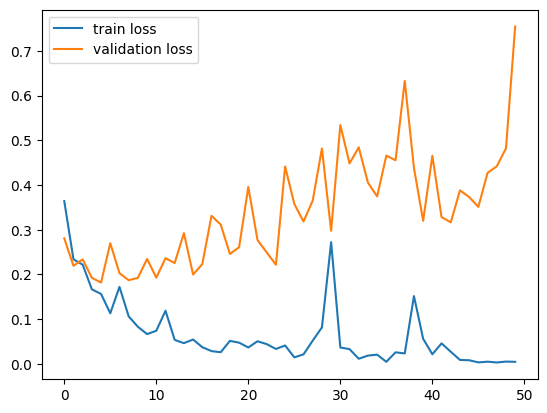

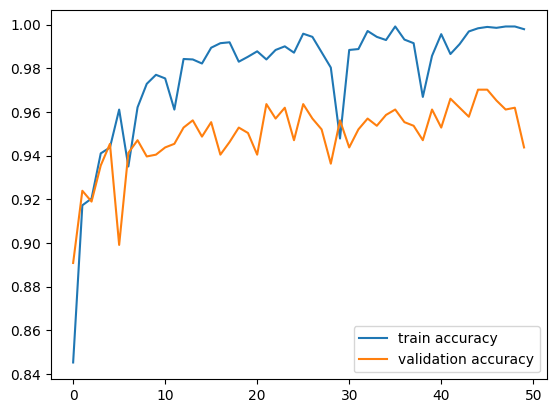

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

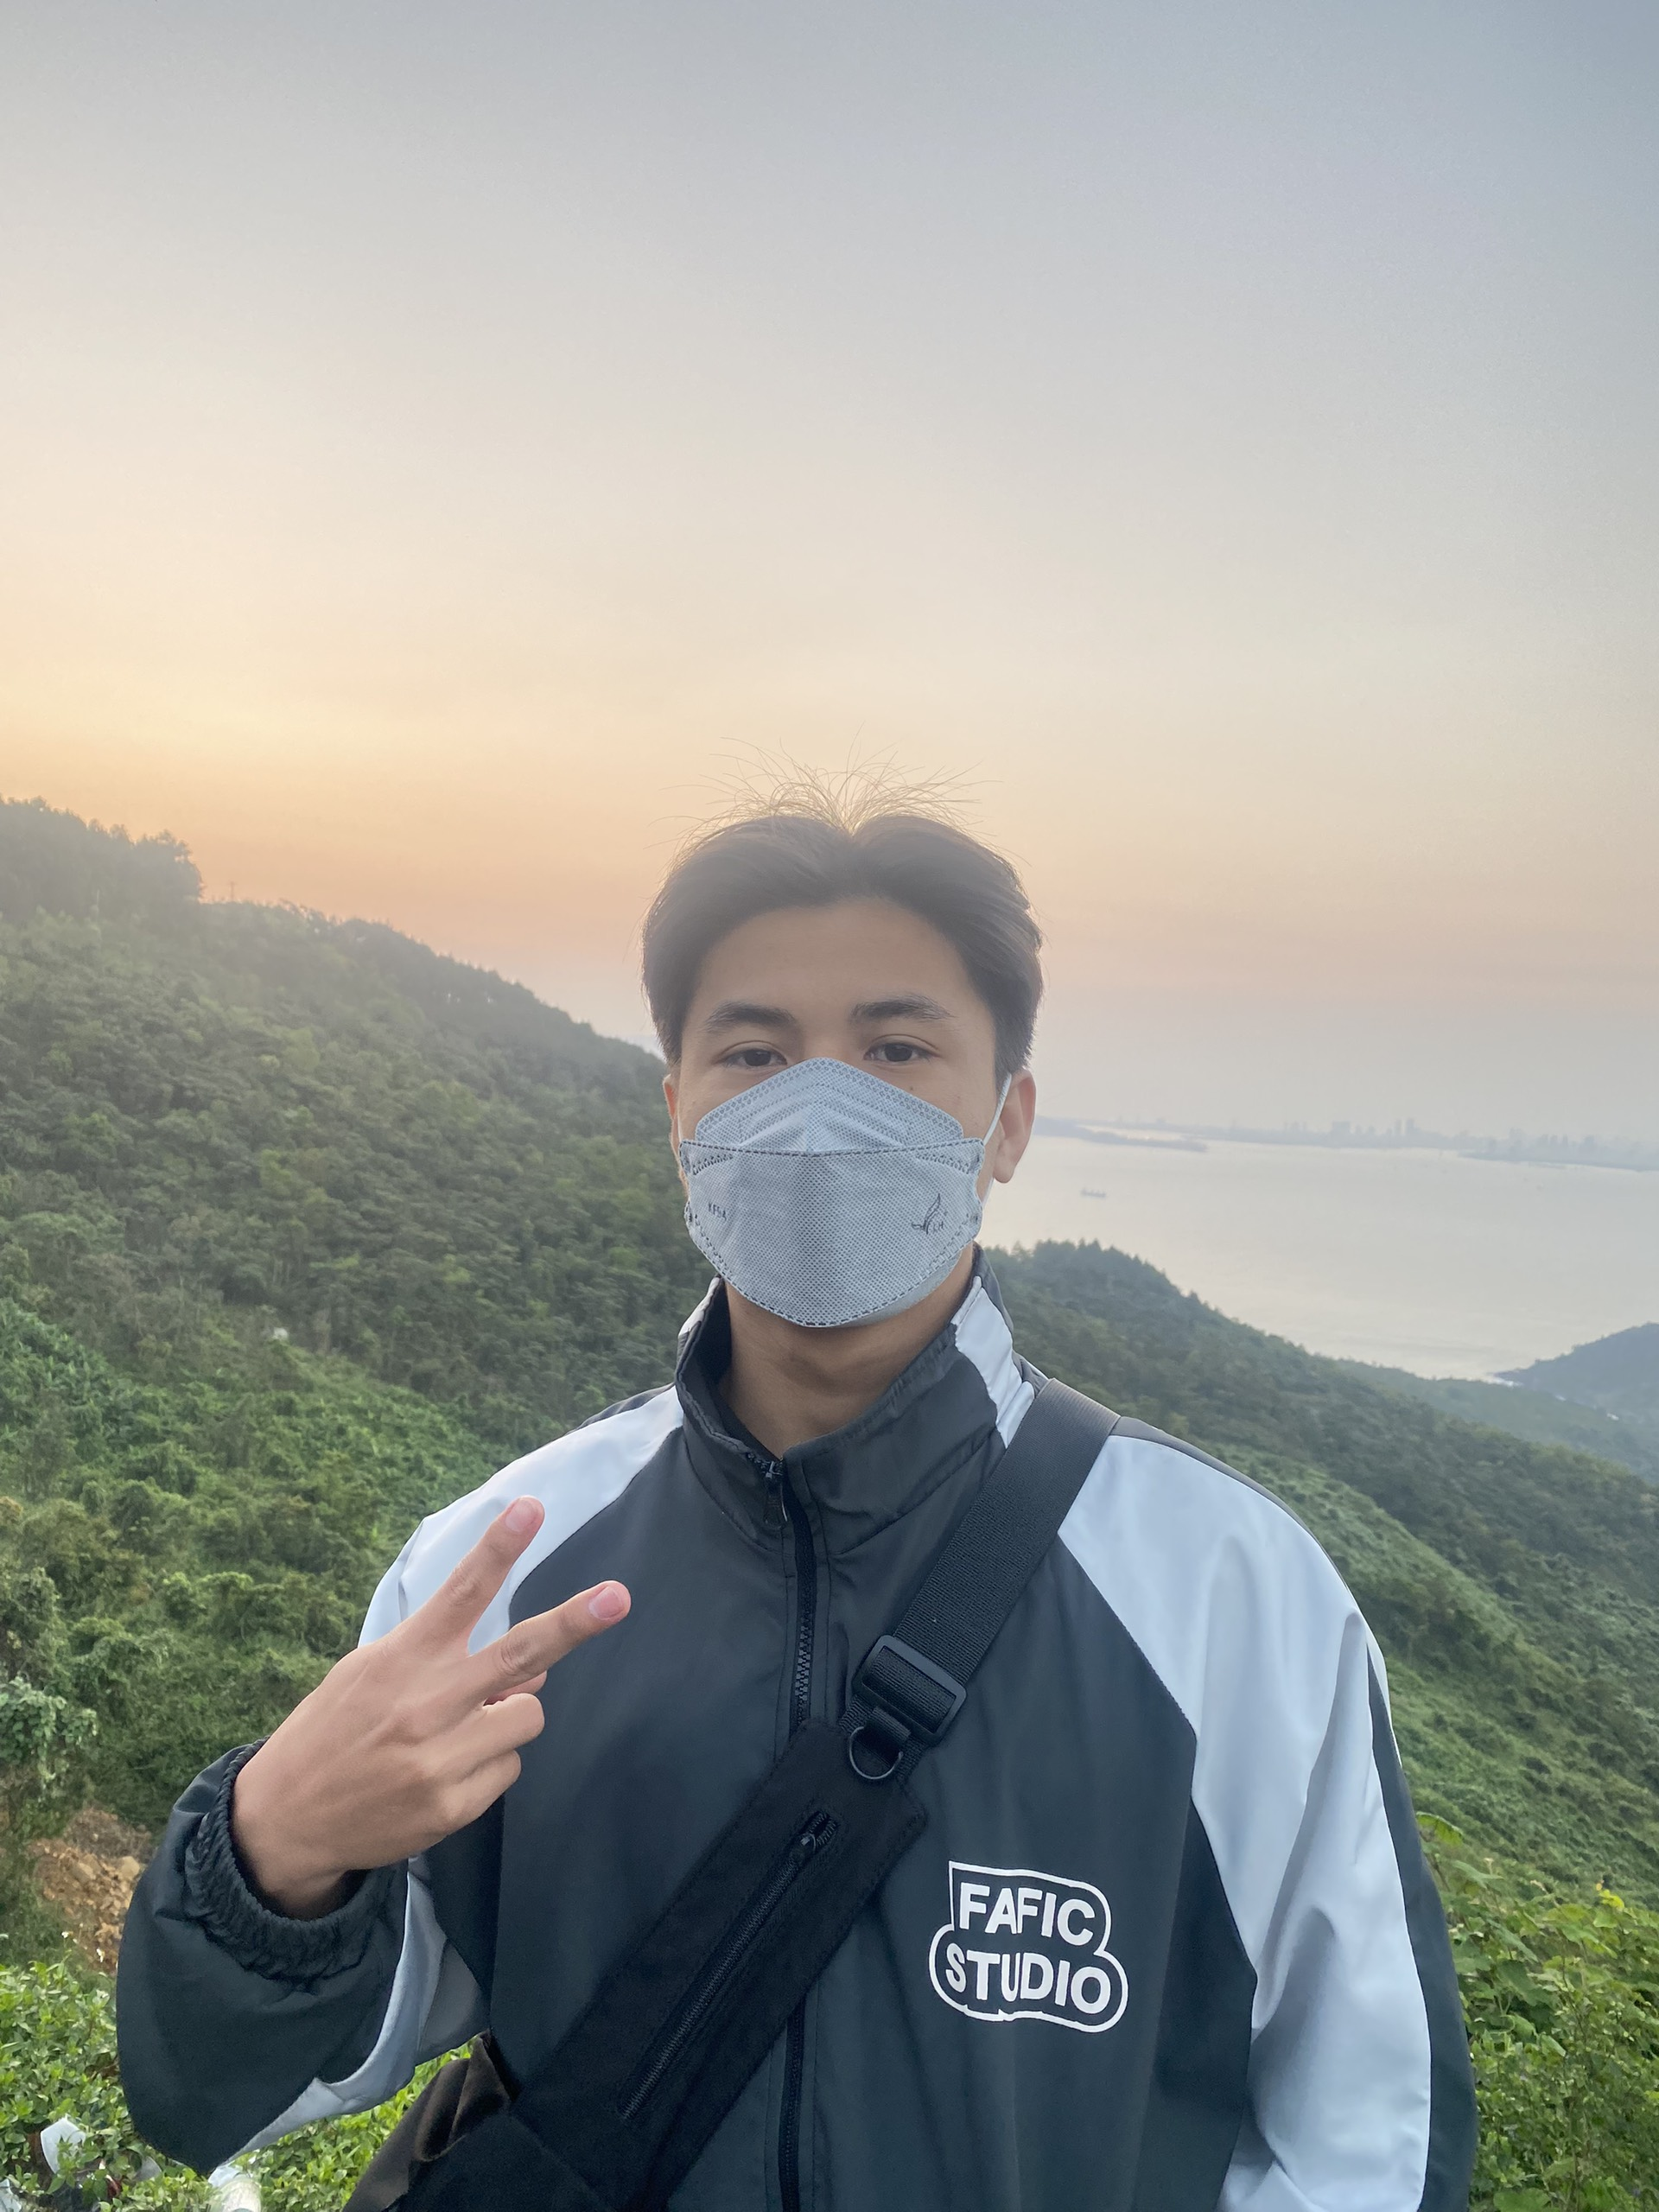

1/1 [==============================] - 0s 150ms/step
[[1.563056e-17 1.000000e+00]]
1
The person in the image is wearing a mask


In [ ]:
from PIL import Image
input_image_path = input('Path of the image to be predicted: ')

input_image_show = cv2.imread(input_image_path)

cv2_imshow(input_image_show)

input_image = Image.open(input_image_path)

input_image = input_image.resize((128,128))

input_image = input_image.convert('RGB')

input_image = np.array(input_image)

input_image_scaled = input_image/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialize bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(img,scaleFactor = 1.1, minNeighbors = 4)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
        face_img = img[y:y+h, x:x+w]
        face_img = cv2.cvtColor(face_img,cv2.COLOR_BGR2RGB)
        face_img = cv2.resize(face_img, dsize = (128,128))
        # face_img = face_img.convert('RGB')
        face_array = img_to_array(face_img)

        face_array_scaled = face_array/255
        input_image_reshaped = np.reshape(face_array_scaled, [1,128,128,3])

        input_prediction = model.predict(input_image_reshaped)
        input_pred_label = np.argmax(input_prediction)
        if input_pred_label == 1:
            bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(0,255,0),2)
            bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format('Wearing a mask', float(input_prediction[0][input_pred_label])),
                            (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                            (0,255,0), 2)
        else:
            bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)
            bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format('Not wearing a mask', float(input_prediction[0][input_pred_label])),
                            (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                            (255,0,0), 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes